In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import subprocess
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [14]:
meta = pd.read_csv("../ST_metadata.csv")
sra_meta = pd.read_csv("../SraRunTable.csv")
sra_meta["Sample_ID"] = sra_meta["Run"]
sra_meta = sra_meta[["geo_loc_name", "Sample_ID"]]
sra_meta["Source"] = sra_meta["geo_loc_name"].str.replace("Canada:", "").str.replace("\\", "")
sra_meta = sra_meta.sample(30, random_state = 666).reset_index(drop=True)
meta = pd.concat([meta, sra_meta[["Sample_ID", "Source"]]]).reset_index(drop=True)

/tmp/ipykernel_4188292/845316161.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sra_meta["Source"] = sra_meta["geo_loc_name"].str.replace("Canada:", "").str.replace("\\", "")


In [15]:
meta.loc[meta["Water"] != "Hatchery", "Water"] = "Wild"

In [16]:
meta["filepaths"] = np.nan
meta.loc[meta["Sample_ID"].str.contains("SRR"), "filepaths"] = "/storage/home/nsl5160/scratch/brook_trout/sra_mapped/" + meta["Sample_ID"] + ".markdup.bam"
meta.loc[~meta["Sample_ID"].str.contains("SRR"), "filepaths"] = "/storage/home/nsl5160/scratch/brook_trout/mapped/" + meta["Sample_ID"] + ".markdup.bam"

In [17]:
meta = meta[meta["filepaths"] != "/storage/home/nsl5160/scratch/brook_trout/mapped/Horn_8.markdup.bam"].reset_index(drop=True)

In [6]:
meta[["filepaths"]][meta["Water"] == "Wild"].to_csv("../wild.bamlist", header = None, index = False)
meta[["filepaths"]][meta["Water"] == "Hatchery"].to_csv("../hatchery.bamlist", header = None, index = False)

In [18]:
meta["Repeat_Content"] = np.nan
meta["Mapping_Coverage"] = np.nan
for i in range(len(meta)):
    try:
        repeats = pd.read_csv("~/scratch/brook_trout/mosdepth/" + 
                          meta["Sample_ID"][i] + "_repeats.regions.bed.gz", 
                          header = None, compression = "gzip", sep = "\t")
        repeats["len"] = repeats[2] - repeats[1]
        repeats["bases"] = repeats[3] * repeats["len"]
        nonrepeats = pd.read_csv("~/scratch/brook_trout/mosdepth/" + 
                          meta["Sample_ID"][i] + "_nonrepeats.regions.bed.gz", 
                          header = None, compression = "gzip", sep = "\t")
        nonrepeats["len"] = nonrepeats[2] - nonrepeats[1]
        nonrepeats["bases"] = nonrepeats[3] * nonrepeats["len"]
        repeats = repeats.bases.sum()
        nonrepeats = nonrepeats.bases.sum()
        meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
        meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
    except:
        pass

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonrepeats ) / 2496201734
/tmp/ipykernel_4188292/1929797271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Repeat_Content"][i] = repeats / ( repeats + nonrepeats )
/tmp/ipykernel_4188292/1929797271.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta["Mapping_Coverage"][i] = ( repeats + nonre

In [123]:
print((meta["Mapping_Coverage"].mean() / 2) * len(meta))
print((meta["Mapping_Coverage"].mean() * 2) * len(meta))

109.1234407385797
436.4937629543188


In [11]:
bed = pd.read_csv("../references/sfon.bed", sep = "\t", header = None)

In [124]:
len(meta)/4

55.0

In [157]:
!wc -l ../wild.bamlist

126 ../wild.bamlist


In [158]:
!wc -l ../hatchery.bamlist

93 ../hatchery.bamlist


In [167]:
126/4

31.5

In [161]:
print((meta["Mapping_Coverage"][meta["Water"] == "Wild"].mean() / 2) * len(meta[meta["Water"] == "Wild"]))
print((meta["Mapping_Coverage"][meta["Water"] == "Hatchery"].mean() / 2) * len(meta[meta["Water"] == "Hatchery"]))

61.531227188410625
47.073180210057494


In [165]:
print((meta["Mapping_Coverage"][meta["Water"] == "Wild"].mean() * 2) * len(meta[meta["Water"] == "Wild"]))
print((meta["Mapping_Coverage"][meta["Water"] == "Hatchery"].mean() * 2) * len(meta[meta["Water"] == "Hatchery"]))

246.1249087536425
188.29272084022998


In [13]:
strain = "hatchery"
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "sfs_input_fst"
    mem = "100"
    cpus = "8"
    bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst"
    outprefix = strain.replace(" ", "_") + "_" + i
    regions = i + ":"
    sitesfile = "../references/no_repeats_regions_list_chrs.txt"
    ref = "../references/sfon_with_mito.fa"
    minind = "24"
    maxdepth = "189"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bamlist + " " + outpath + " " + outprefix + " " + 
         sitesfile + " " + regions + " " + ref + " " + minind + " " + maxdepth], shell=True)

Submitted batch job 33827138
Submitted batch job 33827141
Submitted batch job 33827143
Submitted batch job 33827148
Submitted batch job 33827151
Submitted batch job 33827153
Submitted batch job 33827155
Submitted batch job 33827157
Submitted batch job 33827159
Submitted batch job 33827161
Submitted batch job 33827163
Submitted batch job 33827165
Submitted batch job 33827167
Submitted batch job 33827169
Submitted batch job 33827171
Submitted batch job 33827173
Submitted batch job 33827175
Submitted batch job 33827177
Submitted batch job 33827180
Submitted batch job 33827182
Submitted batch job 33827184
Submitted batch job 33827186
Submitted batch job 33827188
Submitted batch job 33827190
Submitted batch job 33827192
Submitted batch job 33827194
Submitted batch job 33827196
Submitted batch job 33827198
Submitted batch job 33827200
Submitted batch job 33827202
Submitted batch job 33827204
Submitted batch job 33827206
Submitted batch job 33827207
Submitted batch job 33827208
Submitted batc

In [14]:
strain = "wild"
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "sfs_input_fst"
    mem = "100"
    cpus = "8"
    bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst"
    outprefix = strain.replace(" ", "_") + "_" + i
    regions = i + ":"
    sitesfile = "../references/no_repeats_regions_list_chrs.txt"
    ref = "../references/sfon_with_mito.fa"
    minind = "32"
    maxdepth = "247"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bamlist + " " + outpath + " " + outprefix + " " + 
         sitesfile + " " + regions + " " + ref + " " + minind + " " + maxdepth], shell=True)

Submitted batch job 33827217
Submitted batch job 33827218
Submitted batch job 33827220
Submitted batch job 33827221
Submitted batch job 33827222
Submitted batch job 33827223
Submitted batch job 33827224
Submitted batch job 33827225
Submitted batch job 33827226
Submitted batch job 33827227
Submitted batch job 33827228
Submitted batch job 33827229
Submitted batch job 33827230
Submitted batch job 33827231
Submitted batch job 33827232
Submitted batch job 33827233
Submitted batch job 33827234
Submitted batch job 33827235
Submitted batch job 33827236
Submitted batch job 33827237
Submitted batch job 33827238
Submitted batch job 33827239
Submitted batch job 33827240
Submitted batch job 33827241
Submitted batch job 33827242
Submitted batch job 33827243
Submitted batch job 33827244
Submitted batch job 33827245
Submitted batch job 33827246
Submitted batch job 33827247
Submitted batch job 33827248
Submitted batch job 33827249
Submitted batch job 33827250
Submitted batch job 33827251
Submitted batc

In [9]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "sfs_calc"
    mem = "256"
    cpus = "6"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/"
    strain1 = "wild_" + chromo
    strain2 = "hatchery_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + outdir], shell=True)

Submitted batch job 33826635
Submitted batch job 33826636
Submitted batch job 33826637
Submitted batch job 33826638
Submitted batch job 33826639
Submitted batch job 33826640
Submitted batch job 33826641
Submitted batch job 33826642
Submitted batch job 33826643
Submitted batch job 33826644
Submitted batch job 33826645
Submitted batch job 33826646
Submitted batch job 33826647
Submitted batch job 33826648
Submitted batch job 33826649
Submitted batch job 33826650
Submitted batch job 33826651
Submitted batch job 33826652
Submitted batch job 33826653
Submitted batch job 33826654
Submitted batch job 33826655
Submitted batch job 33826656
Submitted batch job 33826657
Submitted batch job 33826658
Submitted batch job 33826660
Submitted batch job 33826661
Submitted batch job 33826662
Submitted batch job 33826663
Submitted batch job 33826664
Submitted batch job 33826665
Submitted batch job 33826666
Submitted batch job 33826667
Submitted batch job 33826668
Submitted batch job 33826669
Submitted batc

In [32]:
sfs_joined = pd.DataFrame()
for sfs in glob.glob("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/wild_*.hatchery_*.folded.ml"):
    tmp = pd.read_csv(sfs, 
            sep = " ", header = None)
    sfs_joined = pd.concat([sfs_joined, tmp]).reset_index(drop=True)
sfs_joined = pd.DataFrame([sfs_joined.sum()])
sfs_joined.to_csv("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/wild.hatchery.folded.ml", 
                  sep = " ", header = None, index = False)

In [12]:
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "fst_calc_2pop"
    mem = "64"
    cpus = "8"
    indir = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/"
    strain1 = "wild_" + i
    strain2 = "hatchery_" + i
    sfs = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/wild.hatchery.folded.ml"
    windowsize = "50000"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + sfs + " " + windowsize], shell=True)

Submitted batch job 35279583
Submitted batch job 35279584
Submitted batch job 35279585
Submitted batch job 35279586
Submitted batch job 35279587
Submitted batch job 35279588
Submitted batch job 35279589
Submitted batch job 35279590
Submitted batch job 35279591
Submitted batch job 35279592
Submitted batch job 35279593
Submitted batch job 35279594
Submitted batch job 35279595
Submitted batch job 35279596
Submitted batch job 35279597
Submitted batch job 35279598
Submitted batch job 35279599
Submitted batch job 35279600
Submitted batch job 35279601
Submitted batch job 35279602
Submitted batch job 35279603
Submitted batch job 35279604
Submitted batch job 35279605
Submitted batch job 35279606
Submitted batch job 35279607
Submitted batch job 35279608
Submitted batch job 35279609
Submitted batch job 35279610
Submitted batch job 35279611
Submitted batch job 35279612
Submitted batch job 35279613
Submitted batch job 35279614
Submitted batch job 35279615
Submitted batch job 35279616
Submitted batc

In [21]:
!cat /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_fst/wild_*.5000.fst.window | grep -v "chr" > ../tmp.fst

In [2]:
chr1 = pd.read_csv("../tmp.fst", sep = "\t", header = None)

In [3]:
chr1.columns = ["interval", "chr", "ps", "Nsites", "Fst"]

In [6]:
chr1 = chr1[chr1["Nsites"].astype(int) > 500].reset_index(drop=True)

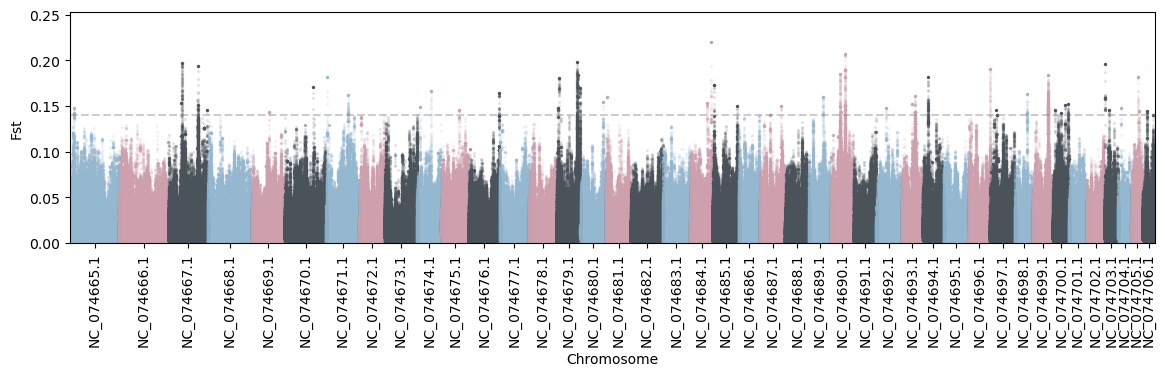

In [7]:
df = chr1[["ps", "chr", "Fst"]].reset_index(drop=True)

#chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
#chrmap["index"] = chrmap["index"] + 1
#chrmap.columns = ["Chromosome", "Accession"]
#chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

#df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

df.loc[df["Fst"] < 0, "Fst"] = 0
df = df[df["Fst"].notna()].reset_index(drop=True)
threshold = np.percentile(df.Fst, 99.99)
upper_1_percent = df.Fst[df.Fst >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["Fst"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='Fst',
               color=colors[num % len(colors)], ax=ax, alpha = 0.1, s = 2)
    if group.empty:
        continue
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='Fst',
               color=colors[num % len(colors)], ax=ax, alpha = 1, s = 2) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("Fst", ascending=False).reset_index(drop=True)["Fst"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('Fst')
plt.xticks(rotation = 90)
# show the graph
plt.show()

In [33]:
gnomon = pd.read_csv("../references/GCF_029448725.1_ASM2944872v1_feature_table.txt", sep = "\t")

In [34]:
gnomon[["genomic_accession", "start", "end"]][~gnomon["# feature"].isin(["gene", "CDS", "V_segment", "C_region"])].to_csv("../references/features.bed", 
                                                     sep = "\t", index = False, header = None)

In [35]:
peaks = df[df["index"] == 1]
peaks["ps"] = peaks["ps"].astype(int)
peaks["start"] = peaks["ps"] - 1
peaks = peaks.sort_values(["chr", "ps"]).reset_index(drop=True)
peaks[["accession", "start", "ps"]].to_csv("../references/peaks.bed", header = None, index = False, sep = "\t")

/tmp/ipykernel_3265033/2847832781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks["ps"] = peaks["ps"].astype(int)
/tmp/ipykernel_3265033/2847832781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks["start"] = peaks["ps"] - 1


In [36]:
%%bash
source ~/.bashrc
conda activate ipyrad
bedtools closest -D a -b ../references/features.bed \
    -a ../references/peaks.bed > ../references/gene_overlaps.bed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [37]:
overlaps = pd.read_csv("../references/gene_overlaps.bed", sep = "\t", header = None)
overlaps.columns = ["accession", "psstart", "ps", "genomic_accession", "start", "end", "distance"]
overlaps = overlaps.merge(gnomon[~gnomon["# feature"].isin(["gene", "CDS", "V_segment", "C_region"])], 
               how = "left", on = ["genomic_accession", "start", "end"])
overlaps = overlaps.sort_values(["accession", "start", "end", "product_length"], 
                                ascending = True).drop_duplicates(["accession", 
                                                                   "start", "end"], 
                                                                  keep = "first").reset_index(drop=True)

In [38]:
overlaps = overlaps.merge(peaks, how = "left", on = ["accession", "ps"]).sort_values("Fst")

In [39]:
overlaps[overlaps.columns.tolist()[0:15] + ["symbol", "Fst", "name", "GeneID", "locus_tag"]].drop_duplicates("symbol").tail(60)

,accession,psstart,ps,genomic_accession,start_x,end,distance,# feature,class,assembly,assembly_unit,seq_type,chromosome,strand,product_accession,symbol,Fst,name,GeneID,locus_tag
141,NC_074700.1,23178999,23179000,NC_074700.1,23071697,23190892,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,36.0,-,XM_055901366.1,LOC129835645,0.171231,IgGFc-binding protein-like,129835645,NaN
16,NC_074667.1,31810299,31810300,NC_074667.1,31815143,31817636,4844,ncRNA,lncRNA,GCF_029448725.1,Primary Assembly,chromosome,3.0,-,XR_008756278.1,LOC129834546,0.171765,uncharacterized LOC129834546,129834546,NaN
45,NC_074673.1,5705699,5705700,NC_074673.1,5708204,5758715,2505,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,9.0,-,XM_055933191.1,LOC129861961,0.172777,DNA-binding protein RFX7-like,129861961,NaN
84,NC_074685.1,2115899,2115900,NC_074685.1,1999958,2189755,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,21.0,-,XM_055873575.1,LOC129818046,0.173358,"protein Shroom3-like, transcript variant X1",129818046,NaN
17,NC_074667.1,46977099,46977100,NC_074667.1,46890452,47249942,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,3.0,-,XM_055917157.1,fhit,0.174135,fragile histidine triad diadenosine triphospha...,129851012,NaN
149,NC_074703.1,28369999,28370000,NC_074703.1,28361805,28396280,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,39.0,+,XM_055905944.1,LOC129838775,0.174527,voltage-dependent calcium channel subunit alph...,129838775,NaN
127,NC_074700.1,7989199,7989200,NC_074700.1,7982245,8009302,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,36.0,-,XM_055900551.1,LOC129835142,0.175115,"NACHT, LRR and PYD domains-containing protein ...",129835142,NaN
63,NC_074678.1,9992199,9992200,NC_074678.1,10026525,10064438,34326,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,14.0,-,XM_055943924.1,LOC129869471,0.175472,espin-like protein,129869471,NaN
58,NC_074677.1,6327399,6327400,NC_074677.1,6345329,6538845,17930,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,13.0,+,XM_055941532.1,LOC129867991,0.175881,peripheral-type benzodiazepine receptor-associ...,129867991,NaN
155,NC_074706.1,9973099,9973100,NC_074706.1,9832620,10091268,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,42.0,-,XM_055909593.1,galntl6,0.177341,polypeptide N-acetylgalactosaminyltransferase ...,129841353,NaN


In [130]:
nonrepeat = pd.read_csv("../references/no_repeats_regions_list_chrs.txt", sep = "\t", header = None)

In [132]:
nonrepeat["len"] = nonrepeat[2] - nonrepeat[1]

In [140]:
meta["estimated_genome_size"] = (nonrepeat["len"].sum() / (1 - meta["Repeat_Content"]))/ 1000000000

In [171]:
!cat ../wild.bamlist ../hatchery.bamlist > ../allbams.bamlist

In [15]:
for i in bed[0][bed[0].str.contains("NC")].tolist():
    task = "angsd"
    mem = "100"
    cpus = "8"
    bamlist = "../allbams.bamlist"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd"
    outprefix = "allbams" + "_" + i
    regions = i + ":"
    sitesfile = "../references/no_repeats_regions_list_chrs.txt"
    ref = "../references/sfon_with_mito.fa"
    minind = "55"
    maxdepth = "437"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         bamlist + " " + outpath + " " + outprefix + " " + 
         sitesfile + " " + regions + " " + ref + " " + minind + " " + maxdepth], shell=True)

Submitted batch job 33827317
Submitted batch job 33827318
Submitted batch job 33827319
Submitted batch job 33827320
Submitted batch job 33827321
Submitted batch job 33827322
Submitted batch job 33827323
Submitted batch job 33827324
Submitted batch job 33827325
Submitted batch job 33827326
Submitted batch job 33827327
Submitted batch job 33827328
Submitted batch job 33827329
Submitted batch job 33827330
Submitted batch job 33827332
Submitted batch job 33827334
Submitted batch job 33827336
Submitted batch job 33827338
Submitted batch job 33827340
Submitted batch job 33827341
Submitted batch job 33827342
Submitted batch job 33827343
Submitted batch job 33827344
Submitted batch job 33827345
Submitted batch job 33827346
Submitted batch job 33827347
Submitted batch job 33827348
Submitted batch job 33827349
Submitted batch job 33827350
Submitted batch job 33827351
Submitted batch job 33827357
Submitted batch job 33827358
Submitted batch job 33827359
Submitted batch job 33827360
Submitted batc

In [ ]:
%%bash
zcat /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams_NC_074665.1.beagle.gz \
    > /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams.beagle
for i in $( ls /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/*.beagle.gz | tail -n+2 ); do
    zcat ${i} | tail -n+2 >> /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams.beagle
done
pigz -p 8 /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams.beagle

In [260]:
for mafs in ["0.05"]:
    task = "pcangsd"
    mem = "120"
    cpus = "20"
    beagle = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams.beagle.gz"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd"
    outprefix = "allbams" + "_minmaf" + mafs
    maf = mafs
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         beagle + " " + outpath + " " + outprefix + " " + maf ], shell=True)

Submitted batch job 34261762


In [213]:
files = pd.read_csv("../allbams.bamlist", header = None, names = ["filepaths"])

In [214]:
files = files.merge(meta, how = "left", on = "filepaths")

In [215]:
files["mask"] = 0
files.loc[~files["Source"].isin(["North Carolina", 
                            "Tennessee"]), "mask"] = 1

In [159]:
files[["mask"]].to_csv("../northernmask.txt", header = None, index = False)

In [263]:
for mafs in ["0.05"]:
    task = "pcangsd_filterind"
    mem = "120"
    cpus = "20"
    beagle = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams.beagle.gz"
    outpath = "/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd"
    outprefix = "northern" + "_minmaf" + mafs
    maf = mafs
    filterind = "/storage/group/ibb3/default/acro_popgen_variants/trout_mitoassembly/northernmask.txt"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         beagle + " " + outpath + " " + outprefix + " " + maf + " " + filterind ], shell=True)

Submitted batch job 34266034


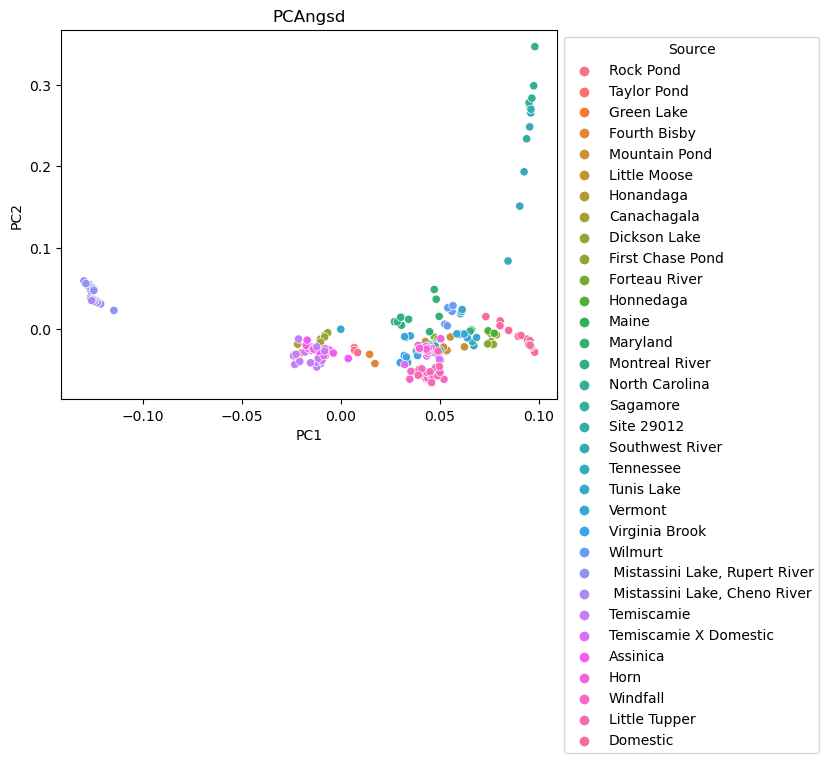

In [255]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
C = np.loadtxt("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams_minmaf0.05.cov") # Reads estimated covariance matrix
D = np.loadtxt("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams_minmaf0.05.selection") # Reads PC based selection statistics

# Plot PCA plot
evals, evecs = np.linalg.eigh(C)
evecs = evecs[:,::-1]
tmp = pd.concat([files, pd.DataFrame(evecs)], axis = 1)
#tmp = pd.concat([files[files["mask"] == 1].reset_index(drop=True), pd.DataFrame(evecs)], axis = 1)
ax = sns.scatterplot(data = tmp, x = 0, y = 1, hue = "Source")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCAngsd")
plt.show()

# Obtain p-values from PC-based selection scan
p = chi2.sf(D, 1)

(200.0, 250.0)

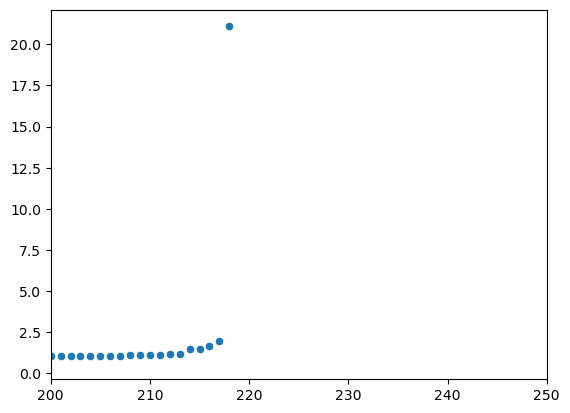

In [258]:
sns.scatterplot(x = list(range(len(evals))), y = evals)
plt.xlim(200,250)

In [251]:
list(range(len(evals)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [257]:
evals

array([ 0.66616405,  0.7063242 ,  0.71137676,  0.71996261,  0.72234058,
        0.72699099,  0.72765323,  0.72962447,  0.73045725,  0.7331366 ,
        0.73533484,  0.73769799,  0.74119055,  0.74442921,  0.74543298,
        0.74644549,  0.74808472,  0.74917963,  0.7512184 ,  0.75389223,
        0.75531203,  0.75560716,  0.75605483,  0.7581944 ,  0.75999394,
        0.76528589,  0.76871303,  0.7860206 ,  0.79657773,  0.86559181,
        0.88744367,  0.90457196,  0.90717881,  0.90891959,  0.91454223,
        0.92160215,  0.93207814,  0.93611017,  0.93768129,  0.93805327,
        0.9444257 ,  0.94520974,  0.94629347,  0.9473388 ,  0.94756069,
        0.94845352,  0.94971804,  0.95082709,  0.95184066,  0.95212662,
        0.95223466,  0.95330265,  0.95353377,  0.95374877,  0.95429134,
        0.95467374,  0.95494717,  0.95540555,  0.9555084 ,  0.95640296,
        0.95753269,  0.95802773,  0.95850166,  0.95923664,  0.95963969,
        0.96023732,  0.96041263,  0.96081678,  0.96195993,  0.96

In [217]:
from scipy.stats import false_discovery_control

In [225]:
pvals = pd.DataFrame(p)

In [226]:
pvals["PC1_corr"] = false_discovery_control(pvals[0])

In [227]:
pvals["PC2_corr"] = false_discovery_control(pvals[1])

/tmp/ipykernel_3123594/344373152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pvals[0])


<Axes: xlabel='0', ylabel='Density'>

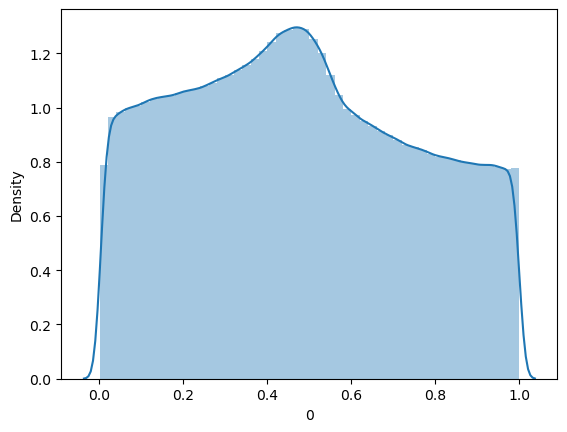

In [228]:
sns.distplot(pvals[0])

/tmp/ipykernel_3123594/3902587862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pvals[1])


<Axes: xlabel='1', ylabel='Density'>

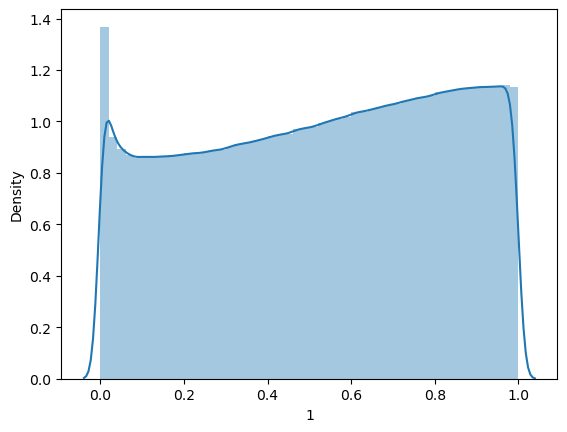

In [229]:
sns.distplot(pvals[1])

In [69]:
!zcat /storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/allbams.beagle.gz \
    | tail -n+2 | cut -f1 | sed "s:.1_:.1 :g" > ../markers.txt

In [230]:
markers = pd.read_csv("../markers.txt", header = None, sep = " ", names = ["chr", "ps"])

In [231]:
masked_bases = pd.read_csv("/storage/home/nsl5160/scratch/brook_trout/wild_hatchery_pcangsd/northern_minmaf0.05.sites", header = None)

In [232]:
markers = pd.concat([markers, masked_bases], axis = 1)

In [233]:
markers = markers[markers[0] == 1].reset_index(drop=True)
markers.columns = ["chr", "ps", "mask"]
markers = pd.concat([markers, pvals], axis = 1)

In [234]:
markers["-log10(p)"] = -np.log10(markers[1])

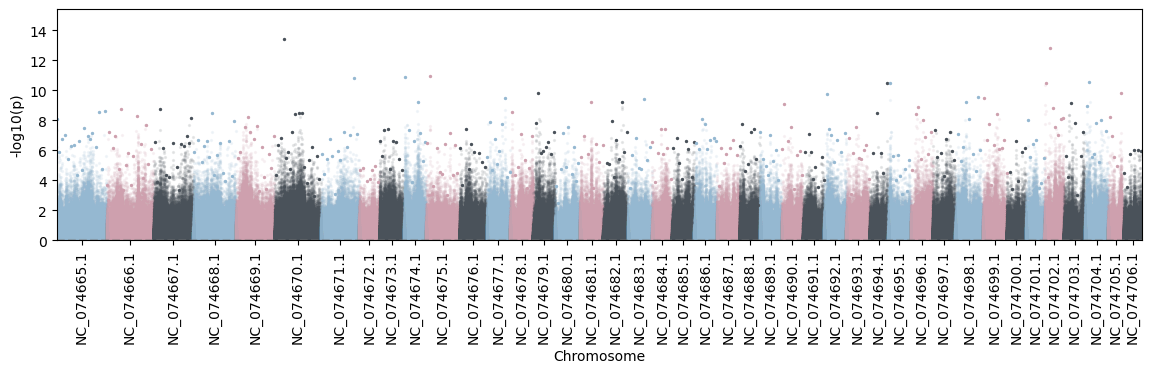

In [235]:
df = markers[["ps", "chr", "-log10(p)"]].reset_index(drop=True)

#chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
#chrmap["index"] = chrmap["index"] + 1
#chrmap.columns = ["Chromosome", "Accession"]
#chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

#df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

thresh = markers[markers[0] < markers["PC1_corr"].sort_values().reset_index(drop=True)[0]].sort_values("-log10(p)").reset_index(drop=True)
thresh = thresh["-log10(p)"][0]

df["index"] = 0
peaks, _ = find_peaks(df["-log10(p)"].tolist(), height = thresh, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='-log10(p)',
               color=colors[num % len(colors)], ax=ax, alpha = 0.1, s = 2)
    if group.empty:
        continue
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='-log10(p)',
               color=colors[num % len(colors)], ax=ax, alpha = 1, s = 2) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("-log10(p)", ascending=False).reset_index(drop=True)["-log10(p)"][0]*1.15])
plt.axhline(y = thresh, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('-log10(p)')
plt.xticks(rotation = 90)
# show the graph
plt.show()

In [240]:
markers.sort_values("PC2_corr")

,chr,ps,mask,0,1,PC1_corr,PC2_corr,-log10(p)
1111010,NC_074670.1,10389577,1,0.585651,3.958609e-14,0.903530,2.106839e-07,13.402457
4870094,NC_074702.1,5759916,1,0.444319,1.504696e-13,0.900759,4.004123e-07,12.822551
1707687,NC_074674.1,3695376,1,0.563012,1.336745e-11,0.901082,1.677731e-05,10.873952
1455530,NC_074671.1,62066200,1,0.522189,1.576172e-11,0.900759,1.677731e-05,10.802396
1831360,NC_074675.1,6338502,1,0.536453,1.188775e-11,0.900759,1.677731e-05,10.924900
...,...,...,...,...,...,...,...,...
154442,NC_074665.1,64813094,1,0.522780,1.000000e+00,0.900759,1.000000e+00,-0.000000
2244974,NC_074678.1,7813536,1,0.269299,1.000000e+00,0.900759,1.000000e+00,-0.000000
459899,NC_074666.1,98687979,1,0.316657,1.000000e+00,0.900759,1.000000e+00,-0.000000
4284740,NC_074696.1,41788612,1,0.877494,1.000000e+00,0.970696,1.000000e+00,-0.000000


In [248]:
gnomon[gnomon["genomic_accession"] == "NC_074670.1"][gnomon["start"] > 10250577][gnomon["end"] < 10559577]

/tmp/ipykernel_3123594/4247827218.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gnomon[gnomon["genomic_accession"] == "NC_074670.1"][gnomon["start"] > 10250577][gnomon["end"] < 10559577]


,# feature,class,assembly,assembly_unit,seq_type,chromosome,genomic_accession,start,end,strand,product_accession,non-redundant_refseq,related_accession,name,symbol,GeneID,locus_tag,feature_interval_length,product_length,attributes
45424,gene,protein_coding,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10268037,10329589,+,NaN,NaN,NaN,NIMA-related kinase 11,nek11,129856789,NaN,61553,NaN,partial
45425,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10268037,10329589,+,XM_055924502.1,NaN,XP_055780477.1,NIMA-related kinase 11,nek11,129856789,NaN,3186,3186.0,partial
45426,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10268037,10327579,+,XP_055780477.1,NaN,XM_055924502.1,serine/threonine-protein kinase Nek11,nek11,129856789,NaN,1176,391.0,partial
45427,gene,protein_coding,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10412585,10518042,-,NaN,NaN,NaN,copine IVa,cpne4a,129856998,NaN,105458,NaN,NaN
45428,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10412585,10518042,-,XM_055924842.1,NaN,XP_055780817.1,"copine IVa, transcript variant X2",cpne4a,129856998,NaN,2525,2525.0,NaN
45429,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10412585,10518041,-,XM_055924841.1,NaN,XP_055780816.1,"copine IVa, transcript variant X1",cpne4a,129856998,NaN,2599,2599.0,NaN
45430,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10413245,10506464,-,XP_055780817.1,NaN,XM_055924842.1,copine-4 isoform X2,cpne4a,129856998,NaN,1587,528.0,NaN
45431,CDS,with_protein,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10413245,10506464,-,XP_055780816.1,NaN,XM_055924841.1,copine-4 isoform X1,cpne4a,129856998,NaN,1662,553.0,NaN
45432,gene,protein_coding,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10526518,10530351,+,NaN,NaN,NaN,uncharacterized protein LOC569930 homolog,zgc:153896,129856656,NaN,3834,NaN,NaN
45433,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,6.0,NC_074670.1,10526518,10530351,+,XM_055924397.1,NaN,XP_055780372.1,uncharacterized protein LOC569930 homolog,zgc:153896,129856656,NaN,2199,2199.0,NaN


In [3]:
temi = meta[meta["Source"] == "Temiscamie"].reset_index(drop=True)
cheno = meta[meta["Source"].str.contains("Cheno")].reset_index(drop=True)
wf = meta[meta["Source"] == "Windfall"].reset_index(drop=True)

In [4]:
temi["filepaths"] = "/storage/home/nsl5160/scratch/brook_trout/mapped/" + temi["Sample_ID"] + ".markdup.bam"
cheno["filepaths"] = "/storage/home/nsl5160/scratch/brook_trout/sra_mapped/" + cheno["Sample_ID"] + ".markdup.bam"
wf["filepaths"] = "/storage/home/nsl5160/scratch/brook_trout/mapped/" + wf["Sample_ID"] + ".markdup.bam"

In [54]:
temi[["filepaths"]].to_csv("../temi.bamlist", header = None, index = False)
cheno[["filepaths"]].to_csv("../cheno.bamlist", header = None, index = False)
wf[["filepaths"]].to_csv("../wf.bamlist", header = None, index = False)

In [10]:
bed = pd.read_csv("../references/sfon.bed", sep = "\t", header = None)

In [66]:
for strain in ["temi", "wf", "cheno"]:
    for i in bed[0][bed[0].str.contains("NC")].tolist():
        task = "sfs_input_fst"
        mem = "100"
        cpus = "8"
        bamlist = "../" + strain.replace(" ", "_") + ".bamlist"
        outpath = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst"
        outprefix = strain.replace(" ", "_") + "_" + i
        regions = i + ":"
        sitesfile = "../references/no_repeats_regions_list_chrs.txt"
        ref = "../references/sfon_with_mito.fa"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             bamlist + " " + outpath + " " + outprefix + " " + 
             sitesfile + " " + regions + " " + ref], shell=True)

Submitted batch job 33231460
Submitted batch job 33231461
Submitted batch job 33231462
Submitted batch job 33231463
Submitted batch job 33231464
Submitted batch job 33231465
Submitted batch job 33231466
Submitted batch job 33231467
Submitted batch job 33231468
Submitted batch job 33231469
Submitted batch job 33231470
Submitted batch job 33231471
Submitted batch job 33231472
Submitted batch job 33231473
Submitted batch job 33231474
Submitted batch job 33231475
Submitted batch job 33231476
Submitted batch job 33231477
Submitted batch job 33231478
Submitted batch job 33231479
Submitted batch job 33231480
Submitted batch job 33231481
Submitted batch job 33231482
Submitted batch job 33231483
Submitted batch job 33231484
Submitted batch job 33231485
Submitted batch job 33231486
Submitted batch job 33231487
Submitted batch job 33231488
Submitted batch job 33231489
Submitted batch job 33231493
Submitted batch job 33231494
Submitted batch job 33231496
Submitted batch job 33231497
Submitted batc

In [119]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "sfs_calc"
    mem = "128"
    cpus = "10"
    indir = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst"
    strain1 = "temi_" + chromo
    strain2 = "wf_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + outdir], shell=True)

Submitted batch job 33407636
Submitted batch job 33407637
Submitted batch job 33407638
Submitted batch job 33407639
Submitted batch job 33407640
Submitted batch job 33407641
Submitted batch job 33407642
Submitted batch job 33407643
Submitted batch job 33407644
Submitted batch job 33407645
Submitted batch job 33407646
Submitted batch job 33407647
Submitted batch job 33407648
Submitted batch job 33407649
Submitted batch job 33407650
Submitted batch job 33407651
Submitted batch job 33407652
Submitted batch job 33407653
Submitted batch job 33407654
Submitted batch job 33407655
Submitted batch job 33407656
Submitted batch job 33407657
Submitted batch job 33407658
Submitted batch job 33407659
Submitted batch job 33407660
Submitted batch job 33407661
Submitted batch job 33407662
Submitted batch job 33407663
Submitted batch job 33407664
Submitted batch job 33407665
Submitted batch job 33407666
Submitted batch job 33407667
Submitted batch job 33407668
Submitted batch job 33407669
Submitted batc

In [142]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "sfs_calc"
    mem = "200"
    cpus = "10"
    indir = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst"
    strain1 = "temi_" + chromo
    strain2 = "cheno_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + outdir], shell=True)

Submitted batch job 33414064
Submitted batch job 33414065
Submitted batch job 33414066
Submitted batch job 33414067
Submitted batch job 33414068
Submitted batch job 33414069
Submitted batch job 33414070
Submitted batch job 33414071
Submitted batch job 33414072
Submitted batch job 33414073
Submitted batch job 33414074
Submitted batch job 33414075
Submitted batch job 33414076
Submitted batch job 33414077
Submitted batch job 33414078
Submitted batch job 33414079
Submitted batch job 33414080
Submitted batch job 33414081
Submitted batch job 33414082
Submitted batch job 33414083
Submitted batch job 33414084
Submitted batch job 33414085
Submitted batch job 33414086
Submitted batch job 33414087
Submitted batch job 33414088
Submitted batch job 33414089
Submitted batch job 33414090
Submitted batch job 33414091
Submitted batch job 33414092
Submitted batch job 33414093
Submitted batch job 33414094
Submitted batch job 33414095
Submitted batch job 33414096
Submitted batch job 33414097
Submitted batc

In [143]:
for chromo in bed[0][bed[0].str.contains("NC_")].tolist():
    task = "sfs_calc"
    mem = "200"
    cpus = "10"
    indir = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst"
    strain1 = "wf_" + chromo
    strain2 = "cheno_" + chromo
    outdir = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/"
    subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
         cpus + " ../" + task + ".sh " + 
         indir + " " + strain1 + " " + strain2 + " " + outdir], shell=True)

Submitted batch job 33414106
Submitted batch job 33414107
Submitted batch job 33414108
Submitted batch job 33414109
Submitted batch job 33414110
Submitted batch job 33414111
Submitted batch job 33414112
Submitted batch job 33414113
Submitted batch job 33414114
Submitted batch job 33414115
Submitted batch job 33414116
Submitted batch job 33414117
Submitted batch job 33414118
Submitted batch job 33414119
Submitted batch job 33414121
Submitted batch job 33414122
Submitted batch job 33414123
Submitted batch job 33414124
Submitted batch job 33414125
Submitted batch job 33414126
Submitted batch job 33414127
Submitted batch job 33414128
Submitted batch job 33414129
Submitted batch job 33414130
Submitted batch job 33414131
Submitted batch job 33414132
Submitted batch job 33414134
Submitted batch job 33414135
Submitted batch job 33414136
Submitted batch job 33414137
Submitted batch job 33414138
Submitted batch job 33414139
Submitted batch job 33414140
Submitted batch job 33414141
Submitted batc

In [173]:
sfs_joined = pd.DataFrame()
for sfs in glob.glob("/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_*.cheno_*.folded.ml"):
    tmp = pd.read_csv(sfs, 
            sep = " ", header = None)
    sfs_joined = pd.concat([sfs_joined, tmp]).reset_index(drop=True)
sfs_joined = pd.DataFrame([sfs_joined.sum()])
sfs_joined.to_csv("/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi.cheno.folded.ml", 
                  sep = " ", header = None, index = False)

In [42]:
!ls -lh /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_*.cheno_*.folded.ml

-rw-rw-r-- 1 nsl5160 nsl5160_collab 19K Feb 24 17:10 /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_NC_074665.1.cheno_NC_074665.1.folded.ml
-rw-rw-r-- 1 nsl5160 nsl5160_collab 19K Feb 24 17:10 /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_NC_074666.1.cheno_NC_074666.1.folded.ml
-rw-rw-r-- 1 nsl5160 nsl5160_collab 19K Feb 24 17:09 /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_NC_074667.1.cheno_NC_074667.1.folded.ml
-rw-rw-r-- 1 nsl5160 nsl5160_collab 19K Feb 24 17:15 /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_NC_074668.1.cheno_NC_074668.1.folded.ml
-rw-rw-r-- 1 nsl5160 nsl5160_collab 19K Feb 24 17:16 /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_NC_074669.1.cheno_NC_074669.1.folded.ml
-rw-rw-r-- 1 nsl5160 nsl5160_collab 19K Feb 24 17:17 /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_NC_074670.1.cheno_NC_074670.1.folded.ml
-rw-rw-r-- 1 nsl5160 nsl5160_collab 19K Feb 24 17:21 /storage/home/nsl5160/s

In [174]:
sfs_joined = pd.DataFrame()
for sfs in glob.glob("/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi_*.wf_*.folded.ml"):
    tmp = pd.read_csv(sfs, 
            sep = " ", header = None)
    sfs_joined = pd.concat([sfs_joined, tmp]).reset_index(drop=True)
sfs_joined = pd.DataFrame([sfs_joined.sum()])
sfs_joined.to_csv("/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi.wf.folded.ml", 
                  sep = " ", header = None, index = False)

In [175]:
sfs_joined = pd.DataFrame()
for sfs in glob.glob("/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/wf_*.cheno_*.folded.ml"):
    tmp = pd.read_csv(sfs, 
            sep = " ", header = None)
    sfs_joined = pd.concat([sfs_joined, tmp]).reset_index(drop=True)
sfs_joined = pd.DataFrame([sfs_joined.sum()])
sfs_joined.to_csv("/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/wf.cheno.folded.ml", 
                  sep = " ", header = None, index = False)

In [177]:
task = "fst_calc"
mem = "128"
cpus = "24"
indir = "/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/"
strain1 = "temi"
strain2 = "wf"
strain3 = "cheno"
subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
     cpus + " ../" + task + ".sh " + 
     indir + " " + strain1 + " " + strain2 + " " + strain3 ], shell=True)

Submitted batch job 33428194


CompletedProcess(args=['sbatch --mem=128g --ntasks=24 ../fst_calc.sh /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/ temi wf cheno'], returncode=0)

In [4]:
!cat ./slurm-33428194.out | tail -100

	-> Comparing positions: 1 with 0 has:100000
	-> Comparing positions: 2 with 0 has:100000
	-> Will now do fst temp dump using a chunk of 100000
	-> [readdata] lastread:100000 posi:23711942
	-> Comparing positions: 1 with 0 has:100000
	-> Comparing positions: 2 with 0 has:100000
	-> Will now do fst temp dump using a chunk of 100000
	-> [readdata] lastread:100000 posi:23930573
	-> Comparing positions: 1 with 0 has:100000
	-> Comparing positions: 2 with 0 has:100000
	-> Will now do fst temp dump using a chunk of 100000
	-> [readdata] lastread:100000 posi:24160036
	-> Comparing positions: 1 with 0 has:100000
	-> Comparing positions: 2 with 0 has:100000
	-> Will now do fst temp dump using a chunk of 100000
	-> [readdata] lastread:100000 posi:24362178
	-> Comparing positions: 1 with 0 has:100000
	-> Comparing positions: 2 with 0 has:100000
	-> Will now do fst temp dump using a chunk of 100000
	-> [readdata] lastread:100000 posi:24536453
	-> Comparing positions: 1 with 0 has:100000
	-> Compar

In [6]:
!cat ../fst_calc.sh

#!/bin/bash
#SBATCH --nodes=1
#SBATCH --time=48:00:00
#SBATCH --job-name=fst_2dsfs

source ~/.bashrc
conda activate angsd

INDIR=$1
PREFIX1=$2
PREFIX2=$3
PREFIX3=$4

cd $SLURM_SUBMIT_DIR
cd ${INDIR}

realSFS fst index -fold 1 -cores ${SLURM_NTASKS} \
    ${PREFIX1}.saf.idx \
    ${PREFIX2}.saf.idx \
    ${PREFIX3}.saf.idx \
    -sfs ${PREFIX1}.${PREFIX2}.folded.ml \
    -sfs ${PREFIX1}.${PREFIX3}.folded.ml \
    -sfs ${PREFIX2}.${PREFIX3}.folded.ml \
    -whichFst 1 \
    -fstout ${PREFIX1}.${PREFIX2}.${PREFIX3}

realSFS fst stats ${PREFIX1}.${PREFIX2}.${PREFIX3}.fst.idx \
    > ${PREFIX1}.${PREFIX2}.${PREFIX3}.fst.global

realSFS fst stats2 \
    ${PREFIX1}.${PREFIX2}.${PREFIX3}.fst.idx \
    -win 10000 -step 1000 > ${PREFIX1}.${PREFIX2}.${PREFIX3}.fst.window


In [ ]:
temi-wf
temi-cheno
wf-cheno

In [7]:
!cat /storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi.wf.cheno.fst.global

0.004150	0.047731
0.007921	0.078321
0.010035	0.135027
pbs.pop1	-0.007296
pbs.pop2	0.056203
pbs.pop3	0.088854


In [8]:
sites = pd.read_csv("/storage/home/nsl5160/scratch/brook_trout/cheno_saf_fst/temi.wf.cheno.fst.window", sep = "\t")

In [60]:
sites.sort_values("PBS1")

,region,chr,midPos,Nsites,Fst01,Fst02,Fst12,PBS0,PBS1,PBS2
1734981,"(777447,777481)(3541692,3544591)(3536000,3546000)",NC_074695.1,3541000,36,0.142857,0.672204,0.286003,0.466318,-0.312168,0.649045
1734980,"(777447,777481)(3541692,3544591)(3535000,3545000)",NC_074695.1,3540000,36,0.142857,0.672204,0.286003,0.466318,-0.312168,0.649045
1734983,"(777447,777486)(3541692,3546163)(3538000,3548000)",NC_074695.1,3543000,41,0.139841,0.667898,0.282730,0.460324,-0.309686,0.641989
1734982,"(777447,777486)(3541692,3546163)(3537000,3547000)",NC_074695.1,3542000,41,0.139841,0.667898,0.282730,0.460324,-0.309686,0.641989
1741187,"(3013096,3013130)(10147004,10147074)(10142000,...",NC_074695.1,10147000,36,0.190393,0.640247,0.194468,0.508646,-0.297439,0.513692
...,...,...,...,...,...,...,...,...,...,...
507354,"(37850733,37850760)(81615753,81615820)(8161200...",NC_074670.1,81617000,29,0.604808,0.009888,0.749198,-0.222385,1.150770,0.232323
507353,"(37850733,37850760)(81615753,81615820)(8161100...",NC_074670.1,81616000,29,0.604808,0.009888,0.749198,-0.222385,1.150770,0.232323
507352,"(37850733,37850760)(81615753,81615820)(8161000...",NC_074670.1,81615000,29,0.604808,0.009888,0.749198,-0.222385,1.150770,0.232323
507351,"(37850733,37850760)(81615753,81615820)(8160900...",NC_074670.1,81614000,29,0.604808,0.009888,0.749198,-0.222385,1.150770,0.232323


In [48]:
sites.sort_values("PBS2")

,region,chr,midPos,Nsites,Fst01,Fst02,Fst12,PBS0,PBS1,PBS2
355629,"(39286433,39286453)(82497582,82503352)(8249600...",NC_074668.1,82501000,22,0.478656,0.301789,0.020768,0.494797,0.156549,-0.135562
355628,"(39286433,39286453)(82497582,82503352)(8249500...",NC_074668.1,82500000,22,0.478656,0.301789,0.020768,0.494797,0.156549,-0.135562
263680,"(31271429,31271447)(67492690,67498983)(6749200...",NC_074667.1,67497000,20,0.401574,0.138524,0.153330,0.248058,0.265394,-0.098950
766499,"(11964206,11964221)(27192000,27197845)(2719200...",NC_074675.1,27197000,17,0.407022,0.237984,0.078061,0.356555,0.166043,-0.084767
1926033,"(5324142,5324166)(11674432,11674576)(11665000,...",NC_074699.1,11670000,26,0.380785,0.235497,0.077832,0.333402,0.145901,-0.064873
...,...,...,...,...,...,...,...,...,...,...
1921159,"(3233677,3236578)(6790121,6798999)(6789000,679...",NC_074699.1,6794000,2903,0.065537,0.510807,0.774630,-0.353616,0.421399,1.068615
1921158,"(3233656,3236362)(6788218,6796972)(6788000,679...",NC_074699.1,6793000,2708,0.065270,0.516643,0.779987,-0.359784,0.427282,1.086784
1595359,"(19412853,19412879)(43339138,43342858)(4333700...",NC_074691.1,43342000,28,0.187275,0.365776,0.862689,-0.661396,0.868759,1.116750
746106,"(1677202,1677301)(6633000,6633099)(6633000,664...",NC_074675.1,6638000,101,0.007672,0.599352,0.758742,-0.249757,0.257459,1.164430


In [47]:
sites.sort_values("PBS0")

,region,chr,midPos,Nsites,Fst01,Fst02,Fst12,PBS0,PBS1,PBS2
1595359,"(19412853,19412879)(43339138,43342858)(4333700...",NC_074691.1,43342000,28,0.187275,0.365776,0.862689,-0.661396,0.868759,1.116750
733828,"(19368764,19368782)(43360190,43360208)(4336000...",NC_074674.1,43365000,20,0.091533,0.496109,0.860880,-0.595513,0.691509,1.280908
1595358,"(19412817,19412879)(43336000,43342858)(4333600...",NC_074691.1,43341000,64,0.169592,0.348646,0.830784,-0.581021,0.766859,1.009722
1389861,"(8898723,8898762)(22463328,22472423)(22463000,...",NC_074687.1,22468000,41,0.357908,0.158278,0.829394,-0.576536,1.019559,0.748841
1656189,"(2954088,2954251)(10614002,10615404)(10614000,...",NC_074693.1,10619000,165,0.357440,0.124470,0.809993,-0.542736,0.985031,0.675662
...,...,...,...,...,...,...,...,...,...,...
1895874,"(10940799,10940812)(20772918,20772931)(2076700...",NC_074698.1,20772000,15,0.382979,0.545343,0.009049,0.630987,-0.148135,0.157225
1895873,"(10940799,10940812)(20772918,20772931)(2076600...",NC_074698.1,20771000,15,0.382979,0.545343,0.009049,0.630987,-0.148135,0.157225
1895872,"(10940799,10940812)(20772918,20772931)(2076500...",NC_074698.1,20770000,15,0.382979,0.545343,0.009049,0.630987,-0.148135,0.157225
432901,"(1958079,1958240)(5876454,5882999)(5873000,588...",NC_074670.1,5878000,163,0.375653,0.563692,0.014678,0.642835,-0.171787,0.186573


In [70]:
df = sites.copy()
df.columns = ['region', 'chr', 'ps', "nsites", "fst01", "fst02", 
              "fst12", "PBS0", 'PBS1', 'PBS2']

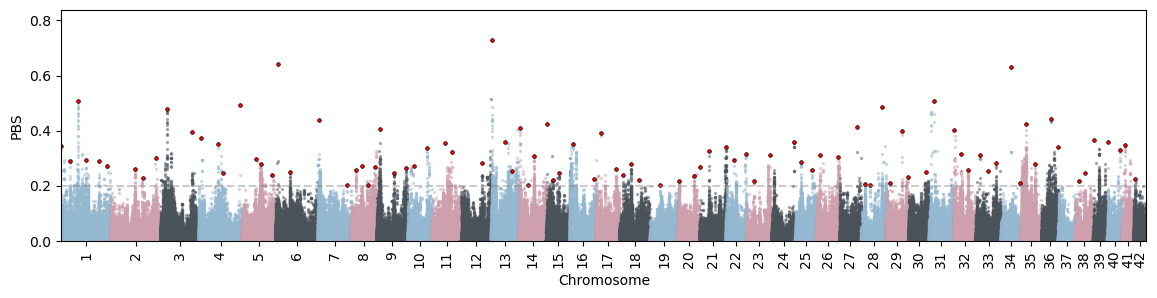

In [27]:
df = df[["ps", "chr", "PBS0"]]

chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
chrmap["index"] = chrmap["index"] + 1
chrmap.columns = ["Chromosome", "Accession"]
chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

df.loc[df["PBS0"] < 0, "PBS0"] = 0
threshold = np.percentile(df.PBS0, 99.9)
upper_1_percent = df.PBS0[df.PBS0 >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["PBS0"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='PBS0',
               color=colors[num % len(colors)], ax=ax, alpha = 0.4, s = 2)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='PBS0',
               color="red", ax=ax, alpha = 1, s = 7, edgecolors='black', linewidth=0.5) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("PBS0", ascending=False).reset_index(drop=True)["PBS0"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('PBS')
plt.xticks(rotation = 90)
# show the graph
plt.show()

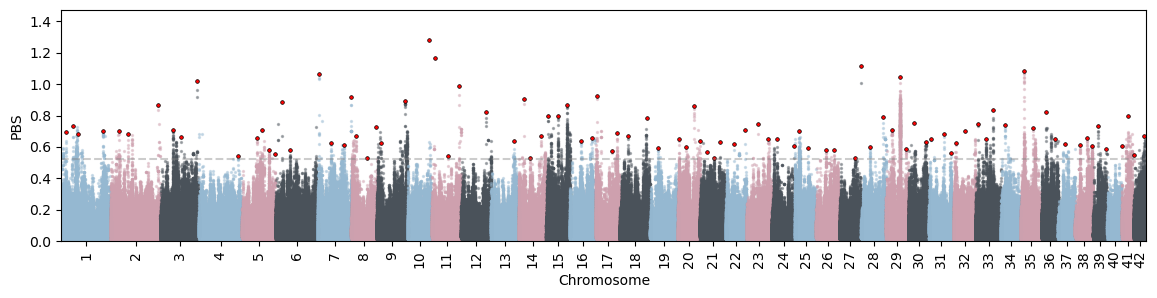

In [51]:
df = df[["ps", "chr", "PBS2"]]

chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
chrmap["index"] = chrmap["index"] + 1
chrmap.columns = ["Chromosome", "Accession"]
chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

df.loc[df["PBS2"] < 0, "PBS2"] = 0
threshold = np.percentile(df.PBS2, 99.9)
upper_1_percent = df.PBS2[df.PBS2 >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["PBS2"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='PBS2',
               color=colors[num % len(colors)], ax=ax, alpha = 0.4, s = 2)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='PBS2',
               color="red", ax=ax, alpha = 1, s = 7, edgecolors='black', linewidth=0.5) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("PBS2", ascending=False).reset_index(drop=True)["PBS2"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('PBS')
plt.xticks(rotation = 90)
# show the graph
plt.show()

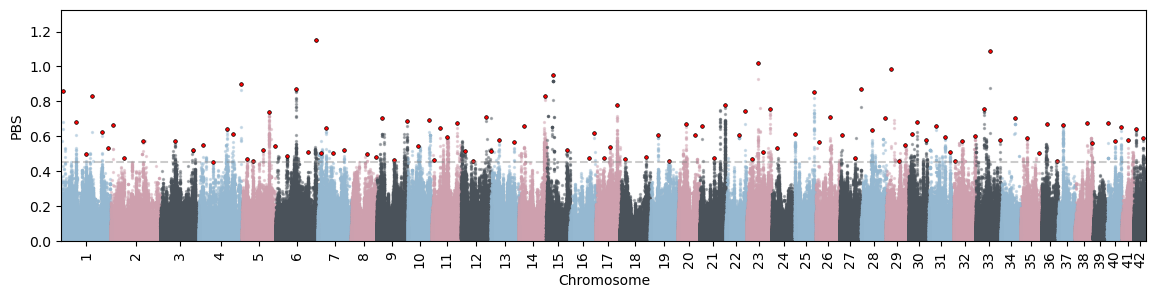

In [71]:
df = df[["ps", "chr", "PBS1"]]

chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
chrmap["index"] = chrmap["index"] + 1
chrmap.columns = ["Chromosome", "Accession"]
chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

df.loc[df["PBS1"] < 0, "PBS1"] = 0
threshold = np.percentile(df.PBS1, 99.9)
upper_1_percent = df.PBS1[df.PBS1 >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["PBS1"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='PBS1',
               color=colors[num % len(colors)], ax=ax, alpha = 0.4, s = 2)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='PBS1',
               color="red", ax=ax, alpha = 1, s = 7, edgecolors='black', linewidth=0.5) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("PBS1", ascending=False).reset_index(drop=True)["PBS1"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('PBS')
plt.xticks(rotation = 90)
# show the graph
plt.show()

In [113]:
gnomon = pd.read_csv("../references/GCF_029448725.1_ASM2944872v1_feature_table.txt", sep = "\t")

In [73]:
gnomon[["genomic_accession", "start", "end"]][~gnomon["# feature"].isin(["gene", "CDS", "V_segment", "C_region"])].to_csv("../references/features.bed", 
                                                     sep = "\t", index = False, header = None)

In [74]:
peaks = df[df["index"] == 1]
peaks["start"] = peaks["ps"] - 1
peaks[["accession", "start", "ps"]].to_csv("../references/peaks.bed", header = None, index = False, sep = "\t")

/tmp/ipykernel_2416097/4117904504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peaks["start"] = peaks["ps"] - 1


In [75]:
%%bash
source ~/.bashrc
conda activate ipyrad
bedtools closest -D a -b ../references/features.bed \
    -a ../references/peaks.bed > ../references/gene_overlaps.bed

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [76]:
overlaps = pd.read_csv("../references/gene_overlaps.bed", sep = "\t", header = None)
overlaps.columns = ["accession", "psstart", "ps", "genomic_accession", "start", "end", "distance"]
overlaps = overlaps.merge(gnomon[~gnomon["# feature"].isin(["gene", "CDS", "V_segment", "C_region"])], 
               how = "left", on = ["genomic_accession", "start", "end"])
overlaps = overlaps.sort_values(["accession", "start", "end", "product_length"], 
                                ascending = True).drop_duplicates(["accession", 
                                                                   "start", "end"], 
                                                                  keep = "first").reset_index(drop=True)

In [ ]:
overlaps = overlaps.merge(df, how = "left", on = ["accession", "ps"]).sort_values("PBS0")

In [78]:
overlaps = overlaps.merge(df, how = "left", on = ["accession", "ps"]).sort_values("PBS1")

In [58]:
overlaps = overlaps.merge(df, how = "left", on = ["accession", "ps"]).sort_values("PBS2")

In [40]:
overlaps[overlaps.columns.tolist()[0:15] + ["symbol"]].drop_duplicates("symbol").tail(60)

,accession,psstart,ps,genomic_accession,start,end,distance,# feature,class,assembly,assembly_unit,seq_type,chromosome,strand,product_accession,symbol
46,NC_074673.1,58571999,58572000,NC_074673.1,58596621,59026666,24622,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,9.0,+,XM_055934959.1,b4galnt4a
41,NC_074672.1,47189999,47190000,NC_074672.1,47156901,47294660,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,8.0,-,XM_055932721.1,LOC129861349
79,NC_074684.1,45183999,45184000,NC_074684.1,45161825,45341312,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,20.0,-,XM_055873508.1,LOC129817910
38,NC_074672.1,20380999,20381000,NC_074672.1,20331405,20466779,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,8.0,-,XM_055931672.1,LOC129860840
47,NC_074674.1,12766999,12767000,NC_074674.1,12555043,12565302,-201698,ncRNA,lncRNA,GCF_029448725.1,Primary Assembly,chromosome,10.0,-,XR_008760992.1,LOC129863642
7,NC_074665.1,94234999,94235000,NC_074665.1,93963341,94304992,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,1.0,+,XM_055936592.1,jmjd1cb
70,NC_074682.1,23267999,23268000,NC_074682.1,23395000,23588326,127001,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,18.0,-,XM_055868657.1,LOC129815168
25,NC_074669.1,37244999,37245000,NC_074669.1,37191112,37224985,-20015,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,5.0,+,XM_055923319.1,LOC129855544
114,NC_074699.1,28944999,28945000,NC_074699.1,28950694,28964771,5695,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,35.0,+,XM_055899892.1,LOC129834679
110,NC_074697.1,41795999,41796000,NC_074697.1,41613223,42625761,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,33.0,+,XM_055896282.1,lsamp


In [59]:
overlaps[overlaps.columns.tolist()[0:15] + ["symbol"]].drop_duplicates("symbol").tail(60)

,accession,psstart,ps,genomic_accession,start,end,distance,# feature,class,assembly,assembly_unit,seq_type,chromosome,strand,product_accession,symbol
39,NC_074677.1,46085999,46086000,NC_074677.1,46092208,46154460,6209,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,13.0,-,XM_055943033.1,slc13a2
94,NC_074695.1,3539999,3540000,NC_074695.1,3501371,3634149,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,31.0,+,XM_055891124.1,LOC129829431
59,NC_074684.1,3165999,3166000,NC_074684.1,2739162,3072663,-93337,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,20.0,-,XM_055872101.1,LOC129817152
101,NC_074697.1,21840999,21841000,NC_074697.1,21832069,21868037,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,33.0,+,XM_055895281.1,LOC129831810
107,NC_074700.1,26154999,26155000,NC_074700.1,25848676,26134970,-20030,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,36.0,-,XM_055901200.1,LOC129835524
69,NC_074687.1,42960999,42961000,NC_074687.1,42946250,42977602,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,23.0,-,XM_055878990.1,LOC129821377
70,NC_074688.1,9346999,9347000,NC_074688.1,9265899,9452394,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,24.0,-,XM_055879596.1,grm5b
52,NC_074680.1,43936999,43937000,NC_074680.1,43875377,43960008,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,16.0,+,XM_055865503.1,LOC129813220
12,NC_074669.1,30152999,30153000,NC_074669.1,29900066,30010173,-142827,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,5.0,+,XM_055923134.1,LOC129855459
110,NC_074702.1,22982999,22983000,NC_074702.1,22978037,22982394,-606,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,38.0,-,XM_055904843.1,LOC129838113


In [79]:
overlaps[overlaps.columns.tolist()[0:15] + ["symbol"]].drop_duplicates("symbol").tail(60)

,accession,psstart,ps,genomic_accession,start,end,distance,# feature,class,assembly,assembly_unit,seq_type,chromosome,strand,product_accession,symbol
181,NC_074705.1,11712999,11713000,NC_074705.1,11734987,11749547,21988,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,41.0,+,XM_055908398.1,LOC129840482
85,NC_074677.1,15158999,15159000,NC_074677.1,15116019,15162342,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,13.0,+,XM_055941837.1,LOC129868146
155,NC_074697.1,48674999,48675000,NC_074697.1,48667038,48668831,-6169,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,33.0,+,XM_055896519.1,LOC129832447
157,NC_074699.1,13138999,13139000,NC_074699.1,13115332,13138533,-467,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,35.0,-,XM_055899229.1,LOC129834333
185,NC_074706.1,20010999,20011000,NC_074706.1,20020169,20023748,9170,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,42.0,-,XM_055909751.1,LOC129841469
78,NC_074675.1,31095999,31096000,NC_074675.1,31077653,31096399,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,11.0,-,XM_055938377.1,LOC129865519
145,NC_074695.1,32096999,32097000,NC_074695.1,32070074,32134779,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,31.0,+,XM_055892219.1,LOC129830047
149,NC_074696.1,44759999,44760000,NC_074696.1,44730201,44798491,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,32.0,+,XM_055894850.1,LOC129831452
109,NC_074686.1,26399999,26400000,NC_074686.1,26237416,26791149,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,22.0,+,XM_055876995.1,LOC129820109
99,NC_074683.1,16208999,16209000,NC_074683.1,15922508,16239585,0,mRNA,NaN,GCF_029448725.1,Primary Assembly,chromosome,19.0,+,XM_055870928.1,LOC129816437


In [ ]:
df = sites.copy()
df.columns = ['region', 'chr', 'ps', "nsites", "fst01", "fst02", 
              "fst12", "PBS0", 'PBS1', 'PBS2']

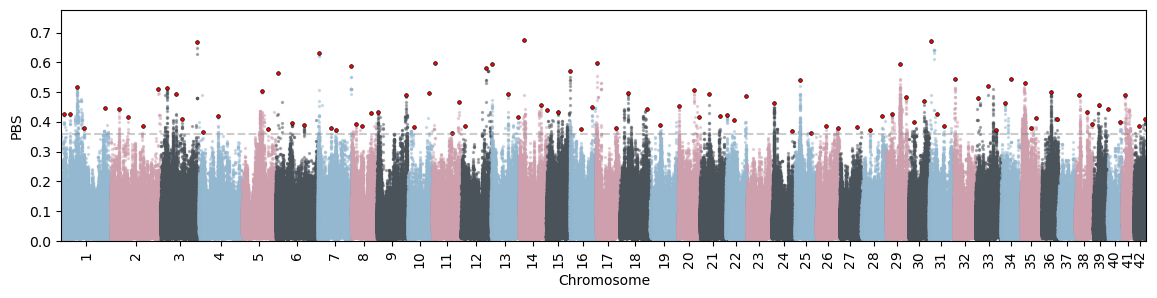

In [19]:
df = df[["ps", "chr", "fst02"]]

chrmap = pd.DataFrame(data = df.chr.unique().tolist()).reset_index(drop=False)
chrmap["index"] = chrmap["index"] + 1
chrmap.columns = ["Chromosome", "Accession"]
chrmap = chrmap.set_index("Accession").to_dict()["Chromosome"]
tmp = df["chr"]

df = df.replace(chrmap)
df["accession"] = tmp
df.chr = df.chr.astype('category')
#df.chr = df.chr.cat.set_categories(['ch-%i' % i for i in range(12)], ordered=True)
df = df.sort_values(['chr', "ps"], ascending = True)

df.loc[df["fst02"] < 0, "fst02"] = 0
threshold = np.percentile(df.fst02, 99.9)
upper_1_percent = df.fst02[df.fst02 >= threshold].sort_values().reset_index(drop=True)[0]

df["index"] = 0
peaks, _ = find_peaks(df["fst02"].tolist(), height = upper_1_percent, distance=10000)
df.loc[df.index.isin(peaks), "index"] = 1
df['ind'] = range(len(df))

df_nonindex = df[df["index"] == 0].groupby(('chr'))
df_index = df[df["index"] == 1].groupby(('chr'))

# manhattan plot
fig = plt.figure(figsize=(14, 3)) # Set the figure size
ax = fig.add_subplot(111)
colors = ['#95B8D1', '#CEA0AE', '#4A525A']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_nonindex):
    group.plot(kind='scatter', x='ind', y='fst02',
               color=colors[num % len(colors)], ax=ax, alpha = 0.4, s = 2)
    x_labels.append(name)
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

for num, (name, group) in enumerate(df_index):
    group.plot(kind='scatter', x='ind', y='fst02',
               color="red", ax=ax, alpha = 1, s = 7, edgecolors='black', linewidth=0.5) 

ax.set_xticks(x_labels_pos)
ax.set_xticklabels(x_labels)

# set axis limits
ax.set_xlim([0, len(df)])
ax.set_ylim([0, df.sort_values("fst02", ascending=False).reset_index(drop=True)["fst02"][0]*1.15])
plt.axhline(y = upper_1_percent, color = 'grey', linestyle = '--', alpha = 0.4)

# x axis label
ax.set_xlabel('Chromosome')
ax.set_ylabel('Fst')
plt.xticks(rotation = 90)
# show the graph
plt.show()

In [9]:
sites

,region,chr,midPos,Nsites,Fst01,Fst02,Fst12,PBS0,PBS1,PBS2
0,"(31,435)(54009,54526)(54000,64000)",NC_074665.1,59000,406,0.048328,0.041708,0.093476,-0.003000,0.052535,0.045603
1,"(436,663)(71082,71999)(62000,72000)",NC_074665.1,67000,229,0.097221,0.038515,0.089465,0.023916,0.078362,0.015360
2,"(436,1285)(71082,72728)(63000,73000)",NC_074665.1,68000,851,0.063261,0.030303,0.089959,0.000928,0.064422,0.029844
3,"(436,1639)(71082,73999)(64000,74000)",NC_074665.1,69000,1205,0.059698,0.046705,0.086842,0.009270,0.052284,0.038562
4,"(436,1659)(71082,74019)(65000,75000)",NC_074665.1,70000,1225,0.059322,0.047833,0.086278,0.009970,0.051185,0.039045
...,...,...,...,...,...,...,...,...,...,...
2165712,"(12040286,12040303)(25969462,25969479)(2596800...",NC_074706.1,25973000,19,0.012866,0.030545,0.057922,-0.007848,0.020797,0.038869
2165713,"(12040286,12040303)(25969462,25969479)(2596900...",NC_074706.1,25974000,19,0.012866,0.030545,0.057922,-0.007848,0.020797,0.038869
2165714,"(12040304,12040315)(25979279,25979290)(2597000...",NC_074706.1,25975000,13,0.029788,0.048967,0.071291,0.003244,0.026997,0.046963
2165715,"(12040304,12040331)(25979279,25980986)(2597100...",NC_074706.1,25976000,29,0.029354,0.047486,0.070098,0.002884,0.026909,0.045767
